# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score

import joblib
import pickle

import warnings
warnings.filterwarnings("ignore")

In [60]:
# Load the dataset
data_df = pd.read_csv("../Dataset/Scraped_Dataset.csv")
data_df.head()

,review,label
0,"not bad stay pretty pleasant, alarm going 3 no...",POSITIVE
1,westin times square cheats customer starwood p...,NEGATIVE
2,good news/ bad news seattle just night opted l...,POSITIVE
3,expectations booked riu bambu online having st...,NEGATIVE
4,hospital stayed 2 weeks got sick stomach upset...,NEGATIVE


# EXPLORATORY DATA ANALYSIS

In [5]:
# Function to visualize distribution of "Positive" and "Negative" reviews
def plot_label_counts(data_df, dist=1000):
    label_counts = data_df['label'].value_counts()
    plt.figure(figsize=(8, 6))
    label_counts.plot(kind='bar', color=['green', 'red'], alpha=0.7, edgecolor='black')

    plt.xlabel('label', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('Comparison of Positive and Negative Labels', fontsize=16)

    for index, value in enumerate(label_counts):
        plt.text(index, value + dist, str(value), ha='center', fontsize=12)

    plt.show()

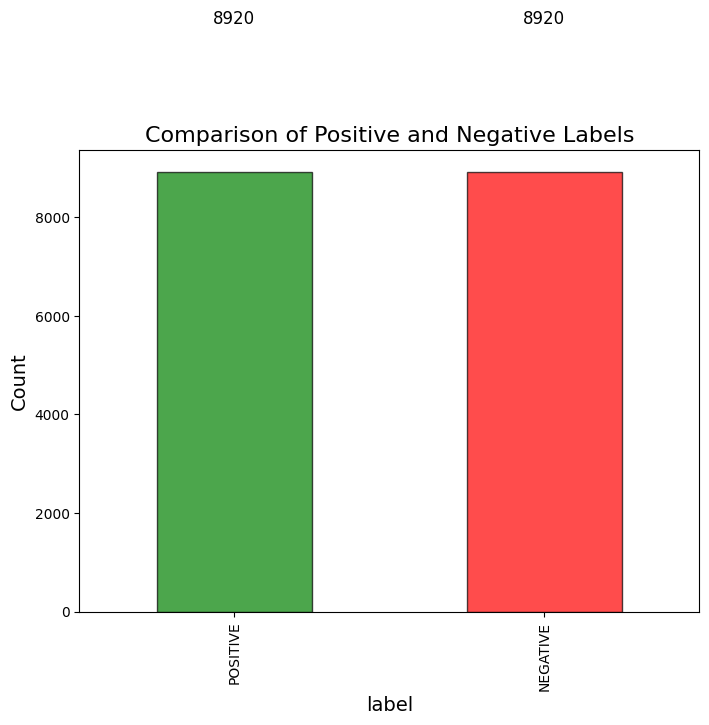

In [6]:
# Visualize distribution
plot_label_counts(data_df, 3000)

# DATA PREPARATION

In [7]:
# Encoding labels
label_enc = LabelEncoder()
y = label_enc.fit_transform(data_df.label.values)
y

array([1, 0, 1, ..., 1, 1, 0])

In [8]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(data_df.review, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14272,), (3568,), (14272,), (3568,))

In [9]:
# Creating feature vector
tfv = TfidfVectorizer(min_df=3, strip_accents='unicode', token_pattern=r'\w{1,}', ngram_range=(1, 3), sublinear_tf=True, stop_words = 'english')

In [10]:
# Fit the TFIDF vectorizer on the training data
tfv.fit(X_train)

TfidfVectorizer(min_df=3, ngram_range=(1, 3), stop_words='english',
                strip_accents='unicode', sublinear_tf=True,
                token_pattern='\\w{1,}')

In [11]:
# Transform the training and test data
X_train_tfv = tfv.transform(X_train)
X_test_tfv = tfv.transform(X_test)

# MODEL

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [14]:
# Fit the Logistic Regression model
model1 = LogisticRegression()
model1.fit(X_train_tfv, y_train)

LogisticRegression()

In [15]:
# Predict on the test set
y_pred = model1.predict(X_test_tfv)

In [22]:
# Save the model
joblib.dump(model1, '../models/NPN_Logistic_Regression_Model.pkl')

['../models/NPN_Logistic_Regression_Model.pkl']

In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [24]:
# Output the results
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(class_report)

Accuracy: 0.8932

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1798
           1       0.89      0.90      0.89      1770

    accuracy                           0.89      3568
   macro avg       0.89      0.89      0.89      3568
weighted avg       0.89      0.89      0.89      3568



## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
# Fit the Random Forest model
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train_tfv, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Predict on the test set
y_pred = model2.predict(X_test_tfv)

In [28]:
# Save the model
joblib.dump(model2, '../models/NPN_Random_Forest_Model.pkl')

['../models/NPN_Random_Forest_Model.pkl']

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [30]:
# Output the results
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(class_report)

Accuracy: 0.8730

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1798
           1       0.91      0.83      0.87      1770

    accuracy                           0.87      3568
   macro avg       0.88      0.87      0.87      3568
weighted avg       0.88      0.87      0.87      3568



## Naive Bayes

In [31]:
from sklearn.naive_bayes import MultinomialNB

In [32]:
# Fit the Naive Bayes model
model3 = MultinomialNB()
model3.fit(X_train_tfv, y_train)

MultinomialNB()

In [33]:
# Predict on the test set
y_pred = model3.predict(X_test_tfv)

In [34]:
# Save the model
joblib.dump(model3, '../models/NPN_Naive_Bayes_Model.pkl')

['../models/NPN_Naive_Bayes_Model.pkl']

In [35]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [36]:
# Output the results
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(class_report)

Accuracy: 0.8694

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1798
           1       0.94      0.79      0.86      1770

    accuracy                           0.87      3568
   macro avg       0.88      0.87      0.87      3568
weighted avg       0.88      0.87      0.87      3568



## XGBoost

In [37]:
import xgboost as xgb

In [38]:
# Fit the XGBoost model
model4 = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
model4.fit(X_train_tfv, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [39]:
# Predict on the test set
y_pred = model4.predict(X_test_tfv)

In [40]:
# Save the model
joblib.dump(model4, '../models/NPN_XGBoost_Model.pkl')

['../models/NPN_XGBoost_Model.pkl']

In [41]:
# Output the results
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(class_report)

Accuracy: 0.8694

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1798
           1       0.94      0.79      0.86      1770

    accuracy                           0.87      3568
   macro avg       0.88      0.87      0.87      3568
weighted avg       0.88      0.87      0.87      3568



## LightGBM

In [42]:
import lightgbm as lgb

In [43]:
# Fit the LightGBM model
model5 = lgb.LGBMClassifier()
model5.fit(X_train_tfv, y_train)

[LightGBM] [Info] Number of positive: 7150, number of negative: 7122
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.913604 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 239279
[LightGBM] [Info] Number of data points in the train set: 14272, number of used features: 7595
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500981 -> initscore=0.003924
[LightGBM] [Info] Start training from score 0.003924


LGBMClassifier()

In [44]:
# Predict on the test set
y_pred = model5.predict(X_test_tfv)

In [45]:
# Save the model
joblib.dump(model5, '../models/NPN_LightGBM_Model.pkl')

['../models/NPN_LightGBM_Model.pkl']

In [46]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [47]:
# Output the results
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(class_report)

Accuracy: 0.8697

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1798
           1       0.86      0.88      0.87      1770

    accuracy                           0.87      3568
   macro avg       0.87      0.87      0.87      3568
weighted avg       0.87      0.87      0.87      3568



## CatBoost

In [49]:
from catboost import CatBoostClassifier

In [50]:
# Fit the CatBoost model
model6 = CatBoostClassifier(silent=True)
model6.fit(X_train_tfv, y_train)

In [51]:
# Predict on the test set
y_pred = model6.predict(X_test_tfv)

In [52]:
# Save the model
joblib.dump(model6, '../models/NPN_CatBoost_Model.pkl')

['../models/NPN_CatBoost_Model.pkl']

In [53]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [54]:
# Output the results
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(class_report)

Accuracy: 0.8722

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1798
           1       0.86      0.88      0.87      1770

    accuracy                           0.87      3568
   macro avg       0.87      0.87      0.87      3568
weighted avg       0.87      0.87      0.87      3568



# MODEL EVALUATION

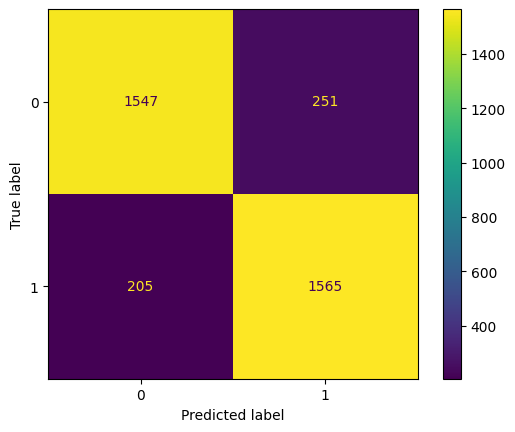

In [55]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot(cmap=plt.cm.viridis)
plt.show()

In [56]:
# Probabilities
y_prob = model1.predict_proba(X_test_tfv)[:, 1]

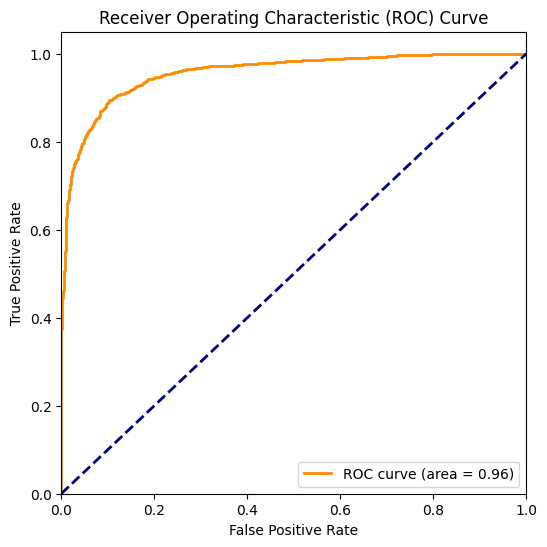

In [57]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# SAMPLE PREDICTIONS

In [58]:
# Sample predictions from the dataset
sample_indices = range(10)

# Get sample data
X_sample = X_test.iloc[sample_indices]
y_sample_true = y_test[sample_indices]
y_sample_pred = y_pred[sample_indices]

# Create a DataFrame to display results
sample_df = pd.DataFrame({
    'Review': X_sample,
    'True Label': label_enc.inverse_transform(y_sample_true),
    'Predicted Label': label_enc.inverse_transform(y_sample_pred)
})

print("Sample Predictions:")
print(sample_df)

Sample Predictions:
                                                  Review True Label  \
3608   interesting scheduled stay melia caribe friend...   NEGATIVE   
10480  This was my first at Ibis Viman Nagar and most...   POSITIVE   
290    we stayed this new & nice property. All the fu...   POSITIVE   
13175  wonderful honeymoon new husband stayed melia b...   POSITIVE   
9605   From the moment I arrived, the staff were so h...   POSITIVE   
3323   loved, review somewhat delayed wanted sure sha...   POSITIVE   
8157   relaxing husband daughters ages 12 16 stayed w...   POSITIVE   
4672   Rooms are comfortable and clean .\r\nOne AC is...   POSITIVE   
11215  The hotel us in a pretty good location, but no...   POSITIVE   
17303  needed r reviews site bit apprehensive needed ...   POSITIVE   

      Predicted Label  
3608         NEGATIVE  
10480        POSITIVE  
290          POSITIVE  
13175        POSITIVE  
9605         POSITIVE  
3323         POSITIVE  
8157         POSITIVE  
4672  

In [59]:
# Sample custom prediction
sample_review = ["The hotel was so good that I could not stay there for long"]
sample_review_tfv = tfv.transform(sample_review)
sample_pred = model1.predict(sample_review_tfv)
sample_pred_label = label_enc.inverse_transform(sample_pred)

print(f'Sample Review: "{sample_review[0]}"')
print(f'Predicted Sentiment: {sample_pred_label[0]}')

Sample Review: "The hotel was so good that I could not stay there for long"
Predicted Sentiment: POSITIVE
